In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import random

from tqdm import tqdm #show a progress meter in the loop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [3]:
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed.csv"
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed.csv"
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_02_20_data_processed.csv"
df_proceeded = pd.read_csv(path)

In [4]:
df_proceeded

,Unnamed: 0,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday,Actual_trip_cum,Planned_trip_cum
0,0,2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,204.0,2,1,1,204,180
1,1,2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,108.0,2,1,1,312,300
2,2,2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,96.0,2,1,1,408,420
3,3,2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,168.0,2,1,1,576,600
4,4,2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,54.0,2,1,1,630,660
...,...,...,...,...,...,...,...,...,...,...,...
132959,132959,2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1.0,180.0,144.0,0,12,1,864,900
132960,132960,2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1.0,60.0,66.0,0,12,1,930,960
132961,132961,2019-12-23 09:02:00,Hartzloh|AK Barmbek,1.0,60.0,60.0,0,12,1,990,1020
132962,132962,2019-12-23 09:03:00,AK Barmbek|Hebebrandstraße,1.0,120.0,132.0,0,12,1,1122,1140


In [5]:
#df_proceeded = df_proceeded.sort_values(by=['Time'])

Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [6]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed102.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed102.csv"
df_proceeded102 = pd.read_csv(path)
#df_proceeded102 = df_proceeded102.sort_values(by=['Time'])

Journey 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [7]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed201.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed201.csv"
df_proceeded201 = pd.read_csv(path)
#df_proceeded201 = df_proceeded201.sort_values(by=['Time'])

Journey 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [8]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed202.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed202.csv"
df_proceeded202 = pd.read_csv(path)
#df_proceeded202 = df_proceeded202.sort_values(by=['Time'])

## **Preprocessing**

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [9]:
data = df_proceeded[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
data

,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,
2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0,2,1,204.0
2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0,2,1,108.0
2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0,2,1,96.0
2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0,2,1,168.0
2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0,2,1,54.0
...,...,...,...,...,...
2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1,0,1,144.0
2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1,0,1,66.0
2019-12-23 09:02:00,Hartzloh|AK Barmbek,1,0,1,60.0


In [11]:
data.loc[data.Precipitation == -499 ]=0 #wrong data in weather data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
data.loc[data.Precipitation == -499 ]

,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [13]:
#data = data.loc[data['dayofweek'].isin([0])]

In [14]:
#filter only the full correct sequence tours
data = data.loc[data['Node A to Node B'].isin(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp'])]
df_proceeded = data

In [15]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [16]:
data.dtypes

Node A to Node B    category
Precipitation       category
dayofweek           category
timeofday           category
Driving_time_s       float64
dtype: object

## One-hot encoding

One-hot encode the categorical feautures.



In [17]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data.head()

,Driving_time_s,Node A to Node B_AK Barmbek|Hebebrandstraße,Node A to Node B_Habichtsplatz|Neue Wöhr,Node A to Node B_Habichtstraße (Mitte)|U Habichtstraße,Node A to Node B_Hartzloh|AK Barmbek,Node A to Node B_Hebebrandstraße|S Rübenkamp,Node A to Node B_Neue Wöhr|Hartzloh,Node A to Node B_U Alter Teichweg|Habichtstraße (Mitte),Node A to Node B_U Habichtstraße|Habichtsplatz,Node A to Node B_U Straßburger Straße|U Alter Teichweg,Node A to Node B_U Wandsbek Markt|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Straßburger Straße,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4
Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 09:47:00,204.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:50:00,108.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:52:00,96.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:54:00,168.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:57:00,54.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [18]:
data.describe

<bound method NDFrame.describe of                      Driving_time_s  ...  timeofday_4
Time                                 ...             
2019-01-02 09:47:00           204.0  ...            0
2019-01-02 09:50:00           108.0  ...            0
2019-01-02 09:52:00            96.0  ...            0
2019-01-02 09:54:00           168.0  ...            0
2019-01-02 09:57:00            54.0  ...            0
...                             ...  ...          ...
2019-12-23 08:58:00           144.0  ...            0
2019-12-23 09:01:00            66.0  ...            0
2019-12-23 09:02:00            60.0  ...            0
2019-12-23 09:03:00           132.0  ...            0
2019-12-23 09:05:00            60.0  ...            0

[132964 rows x 26 columns]>

In [19]:
data101 = data.copy()
#data101

## Preprocessing with other journeys

Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [20]:
data = df_proceeded102[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded102['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [22]:
data = data.loc[data['Node A to Node B'].isin(['U Straßburger Straße|Wandsbeker Allee',
'AK Barmbek|Hartzloh',
'U Habichtstraße|Habichtstraße (Mitte)',
'Habichtsplatz|U Habichtstraße',
'U Alter Teichweg|U Straßburger Straße',
'Wandsbeker Allee|U Wandsbek Markt',
'Hartzloh|Habichtsplatz',
'S Rübenkamp|AK Barmbek',
'Habichtstraße (Mitte)|U Alter Teichweg'])]
df_proceeded102 = data

In [23]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [24]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data[:50]

,Driving_time_s,Node A to Node B_AK Barmbek|Hartzloh,Node A to Node B_Habichtsplatz|U Habichtstraße,Node A to Node B_Habichtstraße (Mitte)|U Alter Teichweg,Node A to Node B_Hartzloh|Habichtsplatz,Node A to Node B_S Rübenkamp|AK Barmbek,Node A to Node B_U Alter Teichweg|U Straßburger Straße,Node A to Node B_U Habichtstraße|Habichtstraße (Mitte),Node A to Node B_U Straßburger Straße|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Wandsbek Markt,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4
Time,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 10:25:00,186.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:28:00,90.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:29:00,138.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:32:00,78.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:33:00,90.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:35:00,126.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:38:00,138.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:40:00,60.0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:41:00,126.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [25]:
data102 = data.copy()
data102

,Driving_time_s,Node A to Node B_AK Barmbek|Hartzloh,Node A to Node B_Habichtsplatz|U Habichtstraße,Node A to Node B_Habichtstraße (Mitte)|U Alter Teichweg,Node A to Node B_Hartzloh|Habichtsplatz,Node A to Node B_S Rübenkamp|AK Barmbek,Node A to Node B_U Alter Teichweg|U Straßburger Straße,Node A to Node B_U Habichtstraße|Habichtstraße (Mitte),Node A to Node B_U Straßburger Straße|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Wandsbek Markt,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4
Time,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 10:25:00,186.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:28:00,90.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:29:00,138.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:32:00,78.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 10:33:00,90.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-14 18:21:00,42.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-12-14 18:23:00,132.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-12-14 18:26:00,408.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


Jouney 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [26]:
data = df_proceeded201[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded201['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [28]:
data = data.loc[data['Node A to Node B'].isin(['Kapstadtring|Manilabrücke',
'U Alsterdorf|Hindenburgstraße',
'Habichtstraße (Mitte)|U Habichtstraße',
'Neue Wöhr|Hartzloh',
'Hartzloh|AK Barmbek',
'Brabandstraße|Moltrechtweg',
'Alsterkrugchaussee (Mitte)|Obenhauptstraße',
'Manilabrücke|Sydneystraße',
'Hebebrandstraße|S Rübenkamp',
'U Habichtstraße|Habichtsplatz',
'Moltrechtweg|Alsterkrugchaussee (Mitte)',
'Hindenburgstraße|Brabandstraße',
'S Rübenkamp|Kapstadtring',
'Wandsbeker Allee|U Straßburger Straße',
'Sydneystraße|U Alsterdorf',
'Habichtsplatz|Neue Wöhr',
'AK Barmbek|Hebebrandstraße',
'U Straßburger Straße|U Alter Teichweg',
'Obenhauptstraße|Lufthansa-Basis (Haupteingang)',
'U Alter Teichweg|Habichtstraße (Mitte)',
'U Wandsbek Markt|Wandsbeker Allee',
])]
df_proceeded201 = data

In [29]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [30]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
#data[:50]

In [31]:
data201 = data.copy()
data201

,Driving_time_s,Node A to Node B_AK Barmbek|Hebebrandstraße,Node A to Node B_Alsterkrugchaussee (Mitte)|Obenhauptstraße,Node A to Node B_Brabandstraße|Moltrechtweg,Node A to Node B_Habichtsplatz|Neue Wöhr,Node A to Node B_Habichtstraße (Mitte)|U Habichtstraße,Node A to Node B_Hartzloh|AK Barmbek,Node A to Node B_Hebebrandstraße|S Rübenkamp,Node A to Node B_Hindenburgstraße|Brabandstraße,Node A to Node B_Kapstadtring|Manilabrücke,Node A to Node B_Manilabrücke|Sydneystraße,Node A to Node B_Moltrechtweg|Alsterkrugchaussee (Mitte),Node A to Node B_Neue Wöhr|Hartzloh,Node A to Node B_Obenhauptstraße|Lufthansa-Basis (Haupteingang),Node A to Node B_S Rübenkamp|Kapstadtring,Node A to Node B_Sydneystraße|U Alsterdorf,Node A to Node B_U Alsterdorf|Hindenburgstraße,Node A to Node B_U Alter Teichweg|Habichtstraße (Mitte),Node A to Node B_U Habichtstraße|Habichtsplatz,Node A to Node B_U Straßburger Straße|U Alter Teichweg,Node A to Node B_U Wandsbek Markt|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Straßburger Straße,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4,timeofday_5
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 10:57:00,186.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:00:00,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:02:00,102.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:04:00,162.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:07:00,36.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 07:33:00,90.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2019-12-23 07:35:00,66.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2019-12-23 07:36:00,102.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


Route 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [32]:
data = df_proceeded202[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded202['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [34]:
data = data.loc[data['Node A to Node B'].isin(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'])]
df_proceeded202 = data

In [35]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [36]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
#data[:50]

In [37]:
data202 = data.copy()
data202

,Driving_time_s,Node A to Node B_AK Barmbek|Hartzloh,Node A to Node B_Alsterkrugchaussee (Mitte)|Moltrechtweg,Node A to Node B_Brabandstraße|Hindenburgstraße,Node A to Node B_Habichtsplatz|U Habichtstraße,Node A to Node B_Habichtstraße (Mitte)|U Alter Teichweg,Node A to Node B_Hartzloh|Habichtsplatz,Node A to Node B_Hindenburgstraße|U Alsterdorf,Node A to Node B_Kapstadtring|S Rübenkamp,Node A to Node B_Lufthansa-Basis (Haupteingang)|Obenhauptstraße,Node A to Node B_Manilabrücke|Kapstadtring,Node A to Node B_Moltrechtweg|Brabandstraße,Node A to Node B_Obenhauptstraße|Alsterkrugchaussee (Mitte),Node A to Node B_S Rübenkamp|AK Barmbek,Node A to Node B_Sydneystraße|Manilabrücke,Node A to Node B_U Alsterdorf|Sydneystraße,Node A to Node B_U Alter Teichweg|U Straßburger Straße,Node A to Node B_U Habichtstraße|Habichtstraße (Mitte),Node A to Node B_U Straßburger Straße|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Wandsbek Markt,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4,timeofday_5
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 11:40:00,186.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:42:00,30.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:43:00,60.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:45:00,96.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2019-01-02 11:46:00,138.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-13 19:03:00,210.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2019-12-13 19:04:00,210.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2019-12-13 19:07:00,258.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


# Select route to implement

In [38]:
#select the route one by one
route = 202
month = 4

if route == 101:
  #route 101
  data = data101.copy()
  path_end = "data101"
  path_name = "Route 101 U Wandsbek Markt to S Rübenkamp"
  #bs = 2**4
  #bs_name = str(bs)
  #n_layers = 3

elif route ==102:
  #route 102
  data = data102.copy()
  path_end = "data102"
  path_name = "Route 102 S Rübenkamp to U Wandsbek Markt"
  #bs = 2**7
  #bs_name = str(bs)
  #n_layers = 2

elif route == 201:
  #route 201
  data = data201.copy()
  path_end = "data201"
  path_name = "Route 201 U Wandsbek Markt to Lufthansa-Basis (Haupteingang)"
  #bs = 2**6
  #bs_name = str(bs)
  #n_layers = 2

elif route == 202:
#route 202
  data = data202.copy()
  path_end = "data202"
  path_name = "Route 202 Lufthansa-Basis (Haupteingang) to U Wandsbek Markt"
  #bs = 2**6
  #bs_name = str(bs)
  #n_layers = 2



In [39]:
data = data.loc[pd.to_datetime(data.index).month == month]

In [40]:
#Import data to collect results and compare
comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")

# Feature scaling


In [ ]:
def df_scaling(df, target_column='target'):
    df = df.copy()

    # move traget function to last column of the dataframe
    df['target'] = df[target_column] # Make a copy of the target column to the last column
    df = df.drop(columns=[target_column]) # Drop the original target column
    
    target_location = df.shape[1] - 1 # column index number of target

    
    #Split with day of the month
    s =pd.to_datetime(data.index).day.tolist()

    split_index_val = s.index(15) #validation set is cover on 3th week
    split_index_test = s.index(23) #test set covers last week
    
    '''
    #Split with month and first week
    s =pd.to_datetime(df.index).month
    d = pd.to_datetime(df.index).day

    split_index_val = np.where((s == 2))[0][0]
    split_index_test = np.where((s == 2) & (d == 11))[0][0]

    train = df[:split_index_val]
    val = df[split_index_val:split_index_test]
    test = df[split_index_test:]
    '''
    '''
    #Split with month
    s =pd.to_datetime(df.index).month
    d = pd.to_datetime(df.index).day

    split_index_val = np.where((s == 4))[0][0]
    split_index_test = np.where((s == 5) )[0][0] #& (d == 11)
    split_index_end = np.where((s == 6) )[0][0]
    '''
    train = df[:split_index_val]
    val = df[split_index_val:split_index_test]
    test = df[split_index_test:] #split_index_end

    # features scaling
    scaler = MinMaxScaler()
    # fit scaler
    scaler.fit(train)
    # transform training dataset
    train = scaler.transform(train)
    # transform validation dataset
    val = scaler.transform(val)
    # transform test dataset
    test = scaler.transform(test)

    # ...train
    X_train = train[:, :target_location]
    y_train = train[:, target_location]

    # ...validation
    X_val = val[:, :target_location]
    y_val = val[:, target_location]

    # ...test
    X_test = test[:, :target_location]
    y_test = test[:, target_location] 
    
    return X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_scaling(df=data, target_column='Driving_time_s')

In [ ]:
print('X_train_shape: ', X_train.shape,' ', 'X_test_shape: ', X_test.shape)
print('y_train_shape: ', y_train.shape,' ', 'y_test_shape: ', y_test.shape)

X_train_shape:  (9065, 32)   X_test_shape:  (1441, 32)
y_train_shape:  (9065,)   y_test_shape:  (1441,)


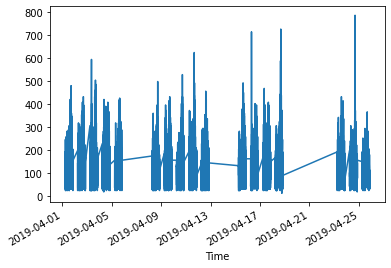

In [ ]:
date_time = pd.to_datetime(data.index)
#plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = data['Driving_time_s']
plot_features.index = date_time
_ = plot_features.plot()


# MLP model

In [ ]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyyaml, numpy, h5py, scipy
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
keras.backend.clear_session()
from keras.optimizers import Adam, SGD, Nadam
!pip install livelossplot
from livelossplot import PlotLossesKeras
#from keras.experimental import CosineDecayRestarts

from keras.models import load_model

from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

MLP model



In [ ]:
def MLP_train(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, X_test = X_test, y_test = y_test, n_layers = 2, n_neurons = 64, bs_double = 4):

    # to make this notebook's output stable across runs but it doesn't work with search logic.
    np.random.seed(42)
    tf.random.set_seed(42)

    bs = 2**bs_double
    bs_name = str(bs)

    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    checkpoint1 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_"+path_end+bs_name+".hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    checkpoint2 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_rmse_"+path_end+bs_name+".hdf5", monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='min')
    checkpoint3 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mae_"+path_end+bs_name+".hdf5", monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    #crate model
    model = keras.models.Sequential() 
    #model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (look_back, num_features)))
    #Hidden Layer 1
    model.add(keras.layers.Dense(n_neurons, name = 'dense_1', input_shape=(X_train.shape[1],),  kernel_initializer='TruncatedNormal', use_bias=False))#, activation='relu'))
    model.add(BatchNormalization(name = 'batch_norm_1'))
    model.add(LeakyReLU(name = 'leaky_relu_1'))
    model.add(keras.layers.Dropout(0.2, name = 'dropout_1'))

    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        if i == n_layers:
            model.add(keras.layers.Dense(n_neurons, name = 'dense_{}'.format(i), kernel_initializer='TruncatedNormal', use_bias=False, activation='relu'))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))
            model.add(keras.layers.Dropout(0.2, name = 'dropout_{}'.format(i)))
        else:
            model.add(keras.layers.Dense(n_neurons, name = 'dense_{}'.format(i), kernel_initializer='TruncatedNormal', use_bias=False)) #,n_neurons*(2**i)
                            #name='h{}'.format(i)))#, activation='relu'))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))
            model.add(LeakyReLU(name = 'leaky_relu_{}'.format(i)))
            model.add(keras.layers.Dropout(0.2, name = 'dropout_{}'.format(i)))

    #Layer output
    model.add(keras.layers.Dense(1, name = 'dense_out'))

    #set learning rate and optimizer
    lr=1.e-3
    '''
    n_steps=2000
    global_step=1
    LR = keras.experimental.CosineDecayRestarts(
        initial_learning_rate=lr,
        first_decay_steps=n_steps,
        t_mul= 1.5,
        m_mul= 1,
        alpha=0.1,
        name=None
    )
    '''
    adam = Adam(learning_rate=lr) #, weight_decay=1e-5)


    model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=bs, callbacks=[callback, checkpoint1], # checkpoint2, checkpoint3, PlotLossesKeras()
                      validation_data=(X_val, y_val))

    # Load the architecture
    model = load_model('/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_'+path_end+bs_name+'.hdf5')

    # Compile with the same settings as it has been saved with earlier
    model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

    # Calculate the RMSE score as fitness score for GA
    rmse = model.evaluate(X_val, y_val)[1]
    #print('Validation RMSE: ', rmse,'\n')
    
    return rmse,

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 253 µs (started: 2021-01-15 17:28:25 +00:00)


# Using genetic algorithms to fine-tune hyperparameters in the model

time window size = look back

number of unit = nuerons in hidden layers

In [42]:
nn_param_choices = {
    'n_neurons': [16, 32, 64, 128, 512, 768, 1024], #
    'n_layers': [2, 3, 4], #
    'bs_double': [4, 5, 6, 7, 8, 9, 10], #
    #'n_timewindow' : [0.5, 1, 1.5, 2],
    
}
network = {} #vector
count = 10 # Number of population in each generation.
generations = 5  # Number of times to produce the generation.
retain=0.4 # the of population that will keep from the current gen to next gen.
random_select=0.1 # randomly keep the abandon vectors by compare a random number with this value.
mutate_chance=0.2 # Randomly mutate the children that have a random number higher than this number.


In [43]:
#create a random vector(network)
def create_rand(nn_param_choices):
  np.random.seed(42)
  for key in nn_param_choices:
    network[key] = random.choice(nn_param_choices[key])
  return network

In [44]:
#create population from the create_rand function as prerequisite size
def create_population(nn_param_choices, count):  
  pop = []
  for _ in range(0, count):
      n = create_rand(nn_param_choices).copy()
      pop.append(n)
  return pop

In [45]:
#train each vector in population to get fitness value
def train_networks(networks, data= data):
    pbar = tqdm(total=len(networks))
    accuracy = []
    for network in networks:
        print(network)
        print(network['n_neurons'])
        X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_scaling(df=data, target_column='Driving_time_s')
        accuracy.append(MLP_train(X_train, y_train, X_val, y_val, X_test, y_test, n_neurons= network['n_neurons'], n_layers= network['n_layers'], bs_double= network['bs_double']))
        pbar.update(1)
    pbar.close()
    return accuracy

In [46]:
networks = create_population(nn_param_choices, count)
networks

[{'bs_double': 4, 'n_layers': 3, 'n_neurons': 32},
 {'bs_double': 6, 'n_layers': 2, 'n_neurons': 32},
 {'bs_double': 6, 'n_layers': 2, 'n_neurons': 16},
 {'bs_double': 5, 'n_layers': 3, 'n_neurons': 1024},
 {'bs_double': 4, 'n_layers': 2, 'n_neurons': 64},
 {'bs_double': 10, 'n_layers': 3, 'n_neurons': 128},
 {'bs_double': 6, 'n_layers': 4, 'n_neurons': 1024},
 {'bs_double': 9, 'n_layers': 3, 'n_neurons': 512},
 {'bs_double': 10, 'n_layers': 2, 'n_neurons': 512},
 {'bs_double': 6, 'n_layers': 2, 'n_neurons': 32}]

In [68]:
#offspring children by crossover then two new children are produced
def breed(mother, father, nn_param_choices = nn_param_choices, mutate_chance=0.2):
    children = []
    for _ in range(2):

        child = {}

        if _ == 1:
            for param in nn_param_choices:
                if children[0][param] == mother[param]:
                    child[param] = father[param]
                else:
                    child[param] = mother[param]
        else:
            # Loop through the parameters
            for param in nn_param_choices:
                child[param] = random.choice(
                    [mother[param], father[param]]
                )

        # Randomly mutate some of the children.
        if mutate_chance > random.random():
            network = mutate(child)

        children.append(child)

    return children

In [50]:
#mutate some part of hyperparameter set
def mutate(child):
    # Choose a random parm.
    mutation = random.choice(list(nn_param_choices.keys()))

    # Mutate the random params.
    child[mutation] = random.choice(nn_param_choices[mutation])

    return child

In [ ]:
#evolve function to generate a new generation
def evolve(networks, parent_accuracy=[1,1,1,1], retain=retain, random_select=0.1, nn_param_choices = nn_param_choices, iteration = 1):
    
    # find the size of parents to retian in the next gen
    retain_length = int(len(networks)*retain)
    
    # Get scores for each network
    if iteration == 0: #train all networks to get score
        accuracy = train_networks(networks)
    else: #in other generation get score for remain parents from previous training
        accuracy_parent_last = parent_accuracy
        accuracy_child = train_networks(networks[retain_length:])
        accuracy = accuracy_parent_last + accuracy_child

    # ranking the scores
    sorted_network_accuracy = [x for _,x in sorted(zip(accuracy,networks), key=lambda pair: pair[0])]
    sorted_accuracy = sorted(accuracy)

    # The remain parents
    parents = sorted_network_accuracy[:retain_length]
    parents_acc = sorted_accuracy[:retain_length]

    # randomly keep some of unqualified vectors.
    for individual in sorted_network_accuracy[retain_length:]:
        if random_select > random.random():
            parents.append(individual)

    # find number of free spots
    parents_length = len(parents)
    desired_length = len(networks) - parents_length
    children = []

    # Add children to the free spaces
    while len(children) < desired_length:

        # random mother and father.
        male = random.randint(0, parents_length-1)
        female = random.randint(0, parents_length-1)

        # ensure that they are not the same vector
        if male != female:
            male = parents[male]
            female = parents[female]

            # Offspring
            babies = breed(male, female, nn_param_choices)

            # Add kid one by one to make sure it dose not exceed free spaces
            for baby in babies:
                if (len(children) < desired_length) & ~(baby in parents):
                    children.append(baby)

    parents.extend(children)
    #print(parents_acc)

    return parents, parents_acc

time: 37.9 ms (started: 2021-01-14 18:14:33 +00:00)


In [ ]:
#function to run the genetic algorithm
def generate(generations, count, nn_param_choices, networks):
    #networks = create_population(nn_param_choices, count) #if want to initial networks here
    networks = networks
    #dummy parent_acc for the first iteration
    parent_acc = list(range(int(len(networks)*retain)))
    print(networks)
    #run iterations
    for i in range(generations-1):
        print('Iteration: ', i+1)
        #print(networks)
        networks, parent_acc = evolve(networks, parent_accuracy= parent_acc, iteration = i)
        print(networks)
    
    #get the score
    print('Iteration: ', i+2)
    score = train_networks(networks)

    #ranking
    sorted_network_score = [x for _,x in sorted(zip(score,networks), key=lambda pair: pair[0])]
    sorted_score = sorted(score)
    return sorted_network_score,sorted_score

time: 13.7 ms (started: 2021-01-14 18:14:38 +00:00)


In [ ]:
ga_network, rmse = generate(generations, count, nn_param_choices, networks)


  0%|          | 0/10 [00:00<?, ?it/s]

[{'n_neurons': 32, 'n_layers': 4, 'bs_double': 10}, {'n_neurons': 768, 'n_layers': 2, 'bs_double': 4}, {'n_neurons': 1024, 'n_layers': 4, 'bs_double': 9}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 7}, {'n_neurons': 32, 'n_layers': 2, 'bs_double': 8}, {'n_neurons': 768, 'n_layers': 3, 'bs_double': 10}, {'n_neurons': 64, 'n_layers': 2, 'bs_double': 9}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 128, 'n_layers': 4, 'bs_double': 9}]
Iteration:  1
{'n_neurons': 32, 'n_layers': 4, 'bs_double': 10}
32
Epoch 1/50
9/9 [==============================] - 2s 83ms/step - loss: 1.6492 - root_mean_squared_error: 1.2759 - mae: 0.9723 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625 - val_mae: 0.1142

Epoch 00001: val_loss improved from inf to 0.02640, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data2021024.hdf5
Epoch 2/50
9/9 [==============================] - 0s 42ms/step - 


 10%|█         | 1/10 [00:09<01:21,  9.07s/it]

{'n_neurons': 768, 'n_layers': 2, 'bs_double': 4}
768
Epoch 1/50
567/567 [==============================] - 7s 10ms/step - loss: 1.5093 - root_mean_squared_error: 1.1843 - mae: 0.8764 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1624 - val_mae: 0.1258

Epoch 00001: val_loss improved from inf to 0.02638, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 5s 10ms/step - loss: 0.0881 - root_mean_squared_error: 0.2956 - mae: 0.2326 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889 - val_mae: 0.0651

Epoch 00002: val_loss improved from 0.02638 to 0.00790, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 6s 10ms/step - loss: 0.0279 - root_mean_squared_error: 0.1667 - mae: 0.1304 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0794 - val_mae: 0.0543

Epoch 00003:


 20%|██        | 2/10 [01:56<05:09, 38.73s/it]

{'n_neurons': 1024, 'n_layers': 4, 'bs_double': 9}
1024
Epoch 1/50
18/18 [==============================] - 64s 4s/step - loss: 40.3467 - root_mean_squared_error: 5.9813 - mae: 3.5253 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927 - val_mae: 0.4745

Epoch 00001: val_loss improved from inf to 0.35129, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 2/50
18/18 [==============================] - 66s 4s/step - loss: 1.1774 - root_mean_squared_error: 1.0830 - mae: 0.8516 - val_loss: 0.1389 - val_root_mean_squared_error: 0.3726 - val_mae: 0.3214

Epoch 00002: val_loss improved from 0.35129 to 0.13885, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 3/50
18/18 [==============================] - 65s 4s/step - loss: 0.5522 - root_mean_squared_error: 0.7429 - mae: 0.5684 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2484 - val_mae: 0.2059

Epoch 00003: val


 30%|███       | 3/10 [57:24<1:59:37, 1025.38s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 7}
16
Epoch 1/50
71/71 [==============================] - 2s 8ms/step - loss: 0.9382 - root_mean_squared_error: 0.9545 - mae: 0.7289 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1226 - val_mae: 0.0920

Epoch 00001: val_loss improved from inf to 0.01502, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202128.hdf5
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 0.2941 - root_mean_squared_error: 0.5421 - mae: 0.4100 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227 - val_mae: 0.0944

Epoch 00002: val_loss did not improve from 0.01502
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.1787 - root_mean_squared_error: 0.4225 - mae: 0.3161 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229 - val_mae: 0.0956

Epoch 00003: val_loss did not improve from 0.01502
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.1110 -


 40%|████      | 4/10 [57:42<1:12:19, 723.22s/it] 

{'n_neurons': 32, 'n_layers': 2, 'bs_double': 8}
32
Epoch 1/50
36/36 [==============================] - 1s 14ms/step - loss: 1.1063 - root_mean_squared_error: 1.0419 - mae: 0.8044 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1243 - val_mae: 0.0966

Epoch 00001: val_loss improved from inf to 0.01544, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202256.hdf5
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4933 - root_mean_squared_error: 0.7020 - mae: 0.5444 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241 - val_mae: 0.0964

Epoch 00002: val_loss improved from 0.01544 to 0.01539, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202256.hdf5
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3727 - root_mean_squared_error: 0.6105 - mae: 0.4723 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1302 - val_mae: 0.1050

Epoch 00003: val_los


 50%|█████     | 5/10 [57:57<42:34, 510.82s/it]  

{'n_neurons': 768, 'n_layers': 3, 'bs_double': 10}
768
Epoch 1/50
9/9 [==============================] - 8s 773ms/step - loss: 19.1867 - root_mean_squared_error: 4.2233 - mae: 2.9230 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2541 - val_mae: 0.2105

Epoch 00001: val_loss improved from inf to 0.06455, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data2021024.hdf5
Epoch 2/50
9/9 [==============================] - 6s 717ms/step - loss: 3.4243 - root_mean_squared_error: 1.8394 - mae: 1.4727 - val_loss: 0.0400 - val_root_mean_squared_error: 0.1999 - val_mae: 0.1667

Epoch 00002: val_loss improved from 0.06455 to 0.03996, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data2021024.hdf5
Epoch 3/50
9/9 [==============================] - 6s 714ms/step - loss: 1.3820 - root_mean_squared_error: 1.1719 - mae: 0.9387 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584 - val_mae: 0.1243

Epoch 00003: va


 60%|██████    | 6/10 [1:03:53<30:57, 464.36s/it]

{'n_neurons': 64, 'n_layers': 2, 'bs_double': 9}
64
Epoch 1/50
18/18 [==============================] - 2s 26ms/step - loss: 1.4888 - root_mean_squared_error: 1.2094 - mae: 0.9354 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220 - val_mae: 0.0907

Epoch 00001: val_loss improved from inf to 0.01488, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 2/50
18/18 [==============================] - 0s 13ms/step - loss: 0.5724 - root_mean_squared_error: 0.7562 - mae: 0.5939 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1294 - val_mae: 0.1037

Epoch 00002: val_loss did not improve from 0.01488
Epoch 3/50
18/18 [==============================] - 0s 12ms/step - loss: 0.4467 - root_mean_squared_error: 0.6683 - mae: 0.5241 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1266 - val_mae: 0.1003

Epoch 00003: val_loss did not improve from 0.01488
Epoch 4/50
18/18 [==============================] - 0s 12ms/step - loss: 0.38


 70%|███████   | 7/10 [1:03:58<16:19, 326.53s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}
16
Epoch 1/50
567/567 [==============================] - 3s 4ms/step - loss: 0.6746 - root_mean_squared_error: 0.8047 - mae: 0.6149 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367 - val_mae: 0.0967

Epoch 00001: val_loss improved from inf to 0.01870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 2s 3ms/step - loss: 0.1080 - root_mean_squared_error: 0.3281 - mae: 0.2476 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109 - val_mae: 0.0802

Epoch 00002: val_loss improved from 0.01870 to 0.01230, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0505 - root_mean_squared_error: 0.2245 - mae: 0.1678 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1054 - val_mae: 0.0748

Epoch 00003: val_


 80%|████████  | 8/10 [1:05:02<08:15, 247.62s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 5ms/step - loss: 0.5924 - root_mean_squared_error: 0.7563 - mae: 0.5581 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1417 - val_mae: 0.0957

Epoch 00001: val_loss improved from inf to 0.02007, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 0s 3ms/step - loss: 0.1639 - root_mean_squared_error: 0.4044 - mae: 0.2868 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1267 - val_mae: 0.0866

Epoch 00002: val_loss improved from 0.02007 to 0.01607, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.0953 - root_mean_squared_error: 0.3084 - mae: 0.2129 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118 - val_mae: 0.0777

Epoch 00003: val_


 90%|█████████ | 9/10 [1:05:32<03:02, 182.29s/it]

{'n_neurons': 128, 'n_layers': 4, 'bs_double': 9}
128
Epoch 1/50
18/18 [==============================] - 6s 105ms/step - loss: 2.0667 - root_mean_squared_error: 1.4249 - mae: 1.1050 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220 - val_mae: 0.0925

Epoch 00001: val_loss improved from inf to 0.01490, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 2/50
18/18 [==============================] - 2s 90ms/step - loss: 0.6228 - root_mean_squared_error: 0.7888 - mae: 0.6098 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250 - val_mae: 0.0918

Epoch 00002: val_loss did not improve from 0.01490
Epoch 3/50
18/18 [==============================] - 2s 89ms/step - loss: 0.4357 - root_mean_squared_error: 0.6601 - mae: 0.5108 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1325 - val_mae: 0.0915

Epoch 00003: val_loss did not improve from 0.01490
Epoch 4/50
18/18 [==============================] - 2s 89ms/step - loss: 0


100%|██████████| 10/10 [1:07:03<00:00, 402.38s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 128, 'n_layers': 4, 'bs_double': 9}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 7}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 10}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 9}, {'n_neurons': 128, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 6}]
Iteration:  2
{'n_neurons': 32, 'n_layers': 4, 'bs_double': 10}
32
Epoch 1/50
9/9 [==============================] - 2s 106ms/step - loss: 1.6492 - root_mean_squared_error: 1.2759 - mae: 0.9723 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625 - val_mae: 0.1142

Epoch 00001: val_loss improved from inf to 0.02640, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data2021024.hdf5
Epoch 2/50
9/9 [==============================] - 0s 41ms/step - los


 17%|█▋        | 1/6 [00:10<00:53, 10.71s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 4}
16
Epoch 1/50
567/567 [==============================] - 2s 3ms/step - loss: 0.4804 - root_mean_squared_error: 0.6732 - mae: 0.5077 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157 - val_mae: 0.0901

Epoch 00001: val_loss improved from inf to 0.01340, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 1s 3ms/step - loss: 0.0542 - root_mean_squared_error: 0.2323 - mae: 0.1739 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018 - val_mae: 0.0724

Epoch 00002: val_loss improved from 0.01340 to 0.01036, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 1s 2ms/step - loss: 0.0253 - root_mean_squared_error: 0.1589 - mae: 0.1196 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975 - val_mae: 0.0669

Epoch 00003: val_


 33%|███▎      | 2/6 [00:54<01:22, 20.59s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 9}
16
Epoch 1/50
18/18 [==============================] - 2s 32ms/step - loss: 1.4389 - root_mean_squared_error: 1.1910 - mae: 0.9176 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1569 - val_mae: 0.1087

Epoch 00001: val_loss improved from inf to 0.02460, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 2/50
18/18 [==============================] - 1s 29ms/step - loss: 0.6099 - root_mean_squared_error: 0.7809 - mae: 0.5864 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1379 - val_mae: 0.0933

Epoch 00002: val_loss improved from 0.02460 to 0.01902, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202512.hdf5
Epoch 3/50
18/18 [==============================] - 0s 16ms/step - loss: 0.4985 - root_mean_squared_error: 0.7060 - mae: 0.5174 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1456 - val_mae: 0.0988

Epoch 00003: val_l


 50%|█████     | 3/6 [01:01<00:49, 16.65s/it]

{'n_neurons': 128, 'n_layers': 4, 'bs_double': 6}
128
Epoch 1/50
142/142 [==============================] - 5s 24ms/step - loss: 1.2229 - root_mean_squared_error: 1.0824 - mae: 0.8325 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2156 - val_mae: 0.1795

Epoch 00001: val_loss improved from inf to 0.04650, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 3s 22ms/step - loss: 0.2658 - root_mean_squared_error: 0.5143 - mae: 0.3964 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220 - val_mae: 0.0862

Epoch 00002: val_loss improved from 0.04650 to 0.01489, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 3s 22ms/step - loss: 0.1242 - root_mean_squared_error: 0.3522 - mae: 0.2745 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045 - val_mae: 0.0718

Epoch 00003:


 67%|██████▋   | 4/6 [02:59<01:34, 47.09s/it]

{'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}
32
Epoch 1/50
142/142 [==============================] - 3s 8ms/step - loss: 0.8953 - root_mean_squared_error: 0.9294 - mae: 0.7074 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249 - val_mae: 0.0923

Epoch 00001: val_loss improved from inf to 0.01559, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 6ms/step - loss: 0.2509 - root_mean_squared_error: 0.5004 - mae: 0.3758 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239 - val_mae: 0.0883

Epoch 00002: val_loss improved from 0.01559 to 0.01536, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 6ms/step - loss: 0.1483 - root_mean_squared_error: 0.3845 - mae: 0.2828 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - val_mae: 0.0789

Epoch 00003: val_


 83%|████████▎ | 5/6 [03:45<00:46, 46.55s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 5ms/step - loss: 0.7602 - root_mean_squared_error: 0.8575 - mae: 0.6512 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224 - val_mae: 0.0932

Epoch 00001: val_loss improved from inf to 0.01498, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 0s 3ms/step - loss: 0.1838 - root_mean_squared_error: 0.4282 - mae: 0.3200 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1206 - val_mae: 0.0928

Epoch 00002: val_loss improved from 0.01498 to 0.01456, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 0s 3ms/step - loss: 0.0871 - root_mean_squared_error: 0.2949 - mae: 0.2181 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169 - val_mae: 0.0909

Epoch 00003: val_


100%|██████████| 6/6 [04:04<00:00, 40.82s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 4}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 7}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 6}]
Iteration:  3
{'n_neurons': 16, 'n_layers': 3, 'bs_double': 4}
16
Epoch 1/50
567/567 [==============================] - 3s 3ms/step - loss: 0.4178 - root_mean_squared_error: 0.6281 - mae: 0.4659 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1164 - val_mae: 0.0812

Epoch 00001: val_loss improved from inf to 0.01355, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 1s 3ms/step - loss


 17%|█▋        | 1/6 [00:53<04:27, 53.49s/it]

{'n_neurons': 32, 'n_layers': 4, 'bs_double': 4}
32
Epoch 1/50
567/567 [==============================] - 4s 4ms/step - loss: 0.6689 - root_mean_squared_error: 0.7945 - mae: 0.5923 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174 - val_mae: 0.0830

Epoch 00001: val_loss improved from inf to 0.01377, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 2s 4ms/step - loss: 0.0974 - root_mean_squared_error: 0.3107 - mae: 0.2311 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002 - val_mae: 0.0693

Epoch 00002: val_loss improved from 0.01377 to 0.01005, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0414 - root_mean_squared_error: 0.2032 - mae: 0.1548 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963 - val_mae: 0.0651

Epoch 00003: val_


 33%|███▎      | 2/6 [02:09<04:01, 60.36s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 7ms/step - loss: 0.8881 - root_mean_squared_error: 0.9301 - mae: 0.7069 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mae: 0.1222

Epoch 00001: val_loss improved from inf to 0.02870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2833 - root_mean_squared_error: 0.5319 - mae: 0.3976 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408 - val_mae: 0.0953

Epoch 00002: val_loss improved from 0.02870 to 0.01982, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 5ms/step - loss: 0.1816 - root_mean_squared_error: 0.4259 - mae: 0.3081 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mae: 0.0871

Epoch 00003: val_


 50%|█████     | 3/6 [02:40<02:33, 51.32s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 3s 9ms/step - loss: 0.8881 - root_mean_squared_error: 0.9301 - mae: 0.7069 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mae: 0.1222

Epoch 00001: val_loss improved from inf to 0.02870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - loss: 0.2833 - root_mean_squared_error: 0.5319 - mae: 0.3976 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408 - val_mae: 0.0953

Epoch 00002: val_loss improved from 0.02870 to 0.01982, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 5ms/step - loss: 0.1816 - root_mean_squared_error: 0.4259 - mae: 0.3081 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mae: 0.0871

Epoch 00003: val_


 67%|██████▋   | 4/6 [03:08<01:28, 44.31s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 7}
16
Epoch 1/50
71/71 [==============================] - 2s 9ms/step - loss: 0.6833 - root_mean_squared_error: 0.8142 - mae: 0.6014 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305 - val_mae: 0.0897

Epoch 00001: val_loss improved from inf to 0.01704, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data202128.hdf5
Epoch 2/50
71/71 [==============================] - 0s 5ms/step - loss: 0.2282 - root_mean_squared_error: 0.4774 - mae: 0.3383 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339 - val_mae: 0.0910

Epoch 00002: val_loss did not improve from 0.01704
Epoch 3/50
71/71 [==============================] - 0s 5ms/step - loss: 0.1698 - root_mean_squared_error: 0.4118 - mae: 0.2845 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1324 - val_mae: 0.0896

Epoch 00003: val_loss did not improve from 0.01704
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 0.1263 -


 83%|████████▎ | 5/6 [03:30<00:37, 37.85s/it]

{'n_neurons': 64, 'n_layers': 3, 'bs_double': 6}
64
Epoch 1/50
142/142 [==============================] - 2s 7ms/step - loss: 0.9925 - root_mean_squared_error: 0.9788 - mae: 0.7517 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043 - val_mae: 0.1657

Epoch 00001: val_loss improved from inf to 0.04172, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - loss: 0.2428 - root_mean_squared_error: 0.4921 - mae: 0.3815 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405 - val_mae: 0.0969

Epoch 00002: val_loss improved from 0.04172 to 0.01974, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 5ms/step - loss: 0.1255 - root_mean_squared_error: 0.3537 - mae: 0.2716 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1067 - val_mae: 0.0722

Epoch 00003: val_


100%|██████████| 6/6 [04:13<00:00, 42.20s/it]

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 64, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 6}]
Iteration:  4
{'n_neurons': 16, 'n_layers': 2, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 5ms/step - loss: 0.7602 - root_mean_squared_error: 0.8575 - mae: 0.6512 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224 - val_mae: 0.0932

Epoch 00001: val_loss improved from inf to 0.01498, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - loss


 17%|█▋        | 1/6 [00:20<01:42, 20.57s/it]

{'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}
32
Epoch 1/50
142/142 [==============================] - 3s 8ms/step - loss: 0.7697 - root_mean_squared_error: 0.8638 - mae: 0.6633 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558 - val_mae: 0.1082

Epoch 00001: val_loss improved from inf to 0.02427, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2186 - root_mean_squared_error: 0.4670 - mae: 0.3561 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1440 - val_mae: 0.0985

Epoch 00002: val_loss improved from 0.02427 to 0.02072, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.1246 - root_mean_squared_error: 0.3527 - mae: 0.2626 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157 - val_mae: 0.0780

Epoch 00003: val_


 33%|███▎      | 2/6 [00:54<01:37, 24.49s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 3s 6ms/step - loss: 0.8881 - root_mean_squared_error: 0.9301 - mae: 0.7069 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mae: 0.1222

Epoch 00001: val_loss improved from inf to 0.02870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2833 - root_mean_squared_error: 0.5319 - mae: 0.3976 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408 - val_mae: 0.0953

Epoch 00002: val_loss improved from 0.02870 to 0.01982, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.1816 - root_mean_squared_error: 0.4259 - mae: 0.3081 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mae: 0.0871

Epoch 00003: val_


 50%|█████     | 3/6 [01:21<01:15, 25.33s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 6ms/step - loss: 0.8881 - root_mean_squared_error: 0.9301 - mae: 0.7069 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mae: 0.1222

Epoch 00001: val_loss improved from inf to 0.02870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2833 - root_mean_squared_error: 0.5319 - mae: 0.3976 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408 - val_mae: 0.0953

Epoch 00002: val_loss improved from 0.02870 to 0.01982, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 6ms/step - loss: 0.1816 - root_mean_squared_error: 0.4259 - mae: 0.3081 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mae: 0.0871

Epoch 00003: val_


 67%|██████▋   | 4/6 [01:48<00:51, 25.73s/it]

{'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}
32
Epoch 1/50
142/142 [==============================] - 2s 8ms/step - loss: 0.7697 - root_mean_squared_error: 0.8638 - mae: 0.6633 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558 - val_mae: 0.1082

Epoch 00001: val_loss improved from inf to 0.02427, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2186 - root_mean_squared_error: 0.4670 - mae: 0.3561 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1440 - val_mae: 0.0985

Epoch 00002: val_loss improved from 0.02427 to 0.02072, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.1246 - root_mean_squared_error: 0.3527 - mae: 0.2626 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157 - val_mae: 0.0780

Epoch 00003: val_


 83%|████████▎ | 5/6 [02:20<00:27, 27.85s/it]

{'n_neurons': 64, 'n_layers': 4, 'bs_double': 6}
64
Epoch 1/50
142/142 [==============================] - 3s 12ms/step - loss: 1.0935 - root_mean_squared_error: 1.0254 - mae: 0.7728 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1615 - val_mae: 0.1159

Epoch 00001: val_loss improved from inf to 0.02609, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 2s 12ms/step - loss: 0.2787 - root_mean_squared_error: 0.5271 - mae: 0.3949 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172 - val_mae: 0.0860

Epoch 00002: val_loss improved from 0.02609 to 0.01373, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 10ms/step - loss: 0.1460 - root_mean_squared_error: 0.3820 - mae: 0.2822 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104 - val_mae: 0.0778

Epoch 00003: v


100%|██████████| 6/6 [03:42<00:00, 37.08s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

[{'n_neurons': 64, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 6}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 4}, {'n_neurons': 768, 'n_layers': 4, 'bs_double': 4}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}]
Iteration:  5
{'n_neurons': 64, 'n_layers': 3, 'bs_double': 6}
64
Epoch 1/50
142/142 [==============================] - 2s 7ms/step - loss: 0.9925 - root_mean_squared_error: 0.9788 - mae: 0.7517 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043 - val_mae: 0.1657

Epoch 00001: val_loss improved from inf to 0.04172, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - los


 10%|█         | 1/10 [00:39<05:53, 39.33s/it]

{'n_neurons': 32, 'n_layers': 4, 'bs_double': 6}
32
Epoch 1/50
142/142 [==============================] - 3s 7ms/step - loss: 0.8953 - root_mean_squared_error: 0.9294 - mae: 0.7074 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249 - val_mae: 0.0923

Epoch 00001: val_loss improved from inf to 0.01559, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - loss: 0.2509 - root_mean_squared_error: 0.5004 - mae: 0.3758 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239 - val_mae: 0.0883

Epoch 00002: val_loss improved from 0.01559 to 0.01536, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 5ms/step - loss: 0.1483 - root_mean_squared_error: 0.3845 - mae: 0.2828 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - val_mae: 0.0789

Epoch 00003: val_


 20%|██        | 2/10 [01:24<05:29, 41.20s/it]

{'n_neurons': 32, 'n_layers': 4, 'bs_double': 4}
32
Epoch 1/50
567/567 [==============================] - 4s 4ms/step - loss: 0.6689 - root_mean_squared_error: 0.7945 - mae: 0.5923 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174 - val_mae: 0.0830

Epoch 00001: val_loss improved from inf to 0.01377, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0974 - root_mean_squared_error: 0.3107 - mae: 0.2311 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002 - val_mae: 0.0693

Epoch 00002: val_loss improved from 0.01377 to 0.01005, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0414 - root_mean_squared_error: 0.2032 - mae: 0.1548 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963 - val_mae: 0.0651

Epoch 00003: val_


 30%|███       | 3/10 [02:35<05:50, 50.05s/it]

{'n_neurons': 32, 'n_layers': 3, 'bs_double': 6}
32
Epoch 1/50
142/142 [==============================] - 2s 8ms/step - loss: 0.7697 - root_mean_squared_error: 0.8638 - mae: 0.6633 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558 - val_mae: 0.1082

Epoch 00001: val_loss improved from inf to 0.02427, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 5ms/step - loss: 0.2186 - root_mean_squared_error: 0.4670 - mae: 0.3561 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1440 - val_mae: 0.0985

Epoch 00002: val_loss improved from 0.02427 to 0.02072, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.1246 - root_mean_squared_error: 0.3527 - mae: 0.2626 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157 - val_mae: 0.0780

Epoch 00003: val_


 40%|████      | 4/10 [03:08<04:29, 44.93s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 7ms/step - loss: 0.5924 - root_mean_squared_error: 0.7563 - mae: 0.5581 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1417 - val_mae: 0.0957

Epoch 00001: val_loss improved from inf to 0.02007, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 0s 3ms/step - loss: 0.1639 - root_mean_squared_error: 0.4044 - mae: 0.2868 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1267 - val_mae: 0.0866

Epoch 00002: val_loss improved from 0.02007 to 0.01607, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 0s 3ms/step - loss: 0.0953 - root_mean_squared_error: 0.3084 - mae: 0.2129 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118 - val_mae: 0.0777

Epoch 00003: val_


 50%|█████     | 5/10 [03:37<03:20, 40.04s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6}
16
Epoch 1/50
142/142 [==============================] - 2s 8ms/step - loss: 0.8881 - root_mean_squared_error: 0.9301 - mae: 0.7069 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694 - val_mae: 0.1222

Epoch 00001: val_loss improved from inf to 0.02870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 4ms/step - loss: 0.2833 - root_mean_squared_error: 0.5319 - mae: 0.3976 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1408 - val_mae: 0.0953

Epoch 00002: val_loss improved from 0.02870 to 0.01982, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 4ms/step - loss: 0.1816 - root_mean_squared_error: 0.4259 - mae: 0.3081 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mae: 0.0871

Epoch 00003: val_


 60%|██████    | 6/10 [04:02<02:21, 35.47s/it]

{'n_neurons': 64, 'n_layers': 4, 'bs_double': 6}
64
Epoch 1/50
142/142 [==============================] - 3s 12ms/step - loss: 1.0935 - root_mean_squared_error: 1.0254 - mae: 0.7728 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1615 - val_mae: 0.1159

Epoch 00001: val_loss improved from inf to 0.02609, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 2/50
142/142 [==============================] - 1s 9ms/step - loss: 0.2787 - root_mean_squared_error: 0.5271 - mae: 0.3949 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172 - val_mae: 0.0860

Epoch 00002: val_loss improved from 0.02609 to 0.01373, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20264.hdf5
Epoch 3/50
142/142 [==============================] - 1s 9ms/step - loss: 0.1460 - root_mean_squared_error: 0.3820 - mae: 0.2822 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104 - val_mae: 0.0778

Epoch 00003: val


 70%|███████   | 7/10 [05:22<02:26, 48.91s/it]

{'n_neurons': 32, 'n_layers': 3, 'bs_double': 4}
32
Epoch 1/50
567/567 [==============================] - 3s 3ms/step - loss: 0.5599 - root_mean_squared_error: 0.7305 - mae: 0.5586 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105 - val_mae: 0.0777

Epoch 00001: val_loss improved from inf to 0.01220, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0693 - root_mean_squared_error: 0.2626 - mae: 0.2000 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897 - val_mae: 0.0618

Epoch 00002: val_loss improved from 0.01220 to 0.00805, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0308 - root_mean_squared_error: 0.1753 - mae: 0.1343 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - val_mae: 0.0597

Epoch 00003: val_


 80%|████████  | 8/10 [06:25<01:46, 53.29s/it]

{'n_neurons': 768, 'n_layers': 4, 'bs_double': 4}
768
Epoch 1/50
567/567 [==============================] - 128s 224ms/step - loss: 2.4649 - root_mean_squared_error: 1.4279 - mae: 0.9620 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733 - val_mae: 0.1360

Epoch 00001: val_loss improved from inf to 0.03004, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 128s 226ms/step - loss: 0.1245 - root_mean_squared_error: 0.3513 - mae: 0.2724 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156 - val_mae: 0.0855

Epoch 00002: val_loss improved from 0.03004 to 0.01335, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 128s 226ms/step - loss: 0.0508 - root_mean_squared_error: 0.2252 - mae: 0.1754 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870 - val_mae: 0.0612

Epo


 90%|█████████ | 9/10 [44:45<12:07, 727.35s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 4}
16
Epoch 1/50
567/567 [==============================] - 4s 4ms/step - loss: 0.6746 - root_mean_squared_error: 0.8047 - mae: 0.6149 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367 - val_mae: 0.0967

Epoch 00001: val_loss improved from inf to 0.01870, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 2s 3ms/step - loss: 0.1080 - root_mean_squared_error: 0.3281 - mae: 0.2476 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109 - val_mae: 0.0802

Epoch 00002: val_loss improved from 0.01870 to 0.01230, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 2s 3ms/step - loss: 0.0505 - root_mean_squared_error: 0.2245 - mae: 0.1678 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1054 - val_mae: 0.0748

Epoch 00003: val_


100%|██████████| 10/10 [45:49<00:00, 274.93s/it]

time: 2h 4min 53s (started: 2021-01-14 18:14:43 +00:00)


In [ ]:
rmse, ga_network

([(0.0683944970369339,),
  (0.06849377602338791,),
  (0.06914170831441879,),
  (0.06920970976352692,),
  (0.069307841360569,),
  (0.06957530975341797,),
  (0.07013912498950958,),
  (0.07075611501932144,),
  (0.0721215084195137,),
  (0.07318631559610367,)],
 [{'bs_double': 4, 'n_layers': 3, 'n_neurons': 32},
  {'bs_double': 6, 'n_layers': 3, 'n_neurons': 64},
  {'bs_double': 6, 'n_layers': 4, 'n_neurons': 32},
  {'bs_double': 4, 'n_layers': 4, 'n_neurons': 32},
  {'bs_double': 6, 'n_layers': 3, 'n_neurons': 32},
  {'bs_double': 6, 'n_layers': 3, 'n_neurons': 16},
  {'bs_double': 4, 'n_layers': 4, 'n_neurons': 16},
  {'bs_double': 6, 'n_layers': 4, 'n_neurons': 64},
  {'bs_double': 4, 'n_layers': 4, 'n_neurons': 768},
  {'bs_double': 6, 'n_layers': 4, 'n_neurons': 16}])

time: 5.89 ms (started: 2021-01-14 20:19:37 +00:00)


In [ ]:
#assign the first order as the best model
best_model = ga_network[0]
#best_model = {'bs_double': 4, 'n_layers': 3, 'n_neurons': 32}
best_model

{'bs_double': 4, 'n_layers': 3, 'n_neurons': 32}

time: 6.62 ms (started: 2021-01-15 17:28:44 +00:00)


In [ ]:
#best_model['n_timewindow']

In [ ]:
bs = 2**best_model['bs_double']
bs_name = str(bs)

time: 1 ms (started: 2021-01-15 17:28:47 +00:00)


In [ ]:
#retrain the final model
X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_scaling(df=data, target_column='Driving_time_s')
MLP_train(X_train, y_train, X_val, y_val, X_test, y_test, n_neurons= best_model['n_neurons'], n_layers= best_model['n_layers'], bs_double= best_model['bs_double'])

Epoch 1/50
567/567 [==============================] - 3s 3ms/step - loss: 0.5599 - root_mean_squared_error: 0.7305 - mae: 0.5586 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105 - val_mae: 0.0777

Epoch 00001: val_loss improved from inf to 0.01220, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 2/50
567/567 [==============================] - 1s 2ms/step - loss: 0.0693 - root_mean_squared_error: 0.2626 - mae: 0.2000 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897 - val_mae: 0.0618

Epoch 00002: val_loss improved from 0.01220 to 0.00805, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20216.hdf5
Epoch 3/50
567/567 [==============================] - 1s 2ms/step - loss: 0.0308 - root_mean_squared_error: 0.1753 - mae: 0.1343 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - val_mae: 0.0597

Epoch 00003: val_loss improved from 0.00805 to 0.00771, saving model 

(0.0683944970369339,)

time: 53.4 s (started: 2021-01-15 17:28:49 +00:00)


# Cross validate on the test set

In [ ]:
#set learning rate and optimizer
lr=1.e-3
'''
n_steps=2000
global_step=1
LR = keras.experimental.CosineDecayRestarts(
    initial_learning_rate=lr,
    first_decay_steps=n_steps,
    t_mul= 1.5,
    m_mul= 1,
    alpha=0.1,
    name=None
)
'''
adam = Adam(learning_rate=lr) #, weight_decay=1e-5)

time: 3.35 ms (started: 2021-01-15 17:36:12 +00:00)


In [ ]:
%time
from keras.models import load_model

# Load the saved model
model = load_model('/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_'+path_end+bs_name+'.hdf5') # Gave an error when loading without 'custom_objects'.. fixed by https://github.com/keras-team/keras/issues/3911
#model = load_model('/content/drive/My Drive/Colab Notebooks/Thesis/best model/MLPGA.best_mse_data20116.hdf5')
# Compile with the same settings as it has been saved with earlier
model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

print('FINISHED')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
FINISHED
time: 175 ms (started: 2021-01-15 17:36:12 +00:00)


In [ ]:
bs_name

'16'

time: 3.02 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
#predict value for test set
y_pred = model.predict(X_test)
y_true = y_test.reshape(y_test.shape[0], 1)

time: 210 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
#evaluate the model result of the test set
model.evaluate(X_test, y_test)[1]

46/46 [==============================] - 0s 956us/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - mae: 0.0445


0.0683944970369339

time: 352 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
# invert scaling for forecast
inv_y_pred = np.concatenate((X_test[:, :], y_pred), axis=1)
inv_y_pred = scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:,-1]

time: 3.99 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
inv_y_pred

array([183.98786223,  69.24548171,  83.22512971, ..., 162.96238554,
        73.03595352, 153.64154863])

time: 3.27 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
# invert scaling for actual
inv_y_true = np.concatenate(( X_test[:,:], y_true), axis=1)
inv_y_true = scaler.inverse_transform(inv_y_true)
inv_y_true = inv_y_true[:,-1]

time: 4.59 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(inv_y_true, inv_y_pred)
rmse = np.sqrt(mean_squared_error(inv_y_true, inv_y_pred))
mae = mean_absolute_error(inv_y_true, inv_y_pred)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test MSE: 1717.859
Test RMSE: 41.447
Test MAE: 27.922
time: 43.2 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
#for plotting graph

x = data[split_index_test:]

datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:]

time: 3.46 ms (started: 2021-01-15 17:36:13 +00:00)


Show in the graph only first 50 points.

46/46 [==============================] - 0s 1ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - mae: 0.0461
FINISHED


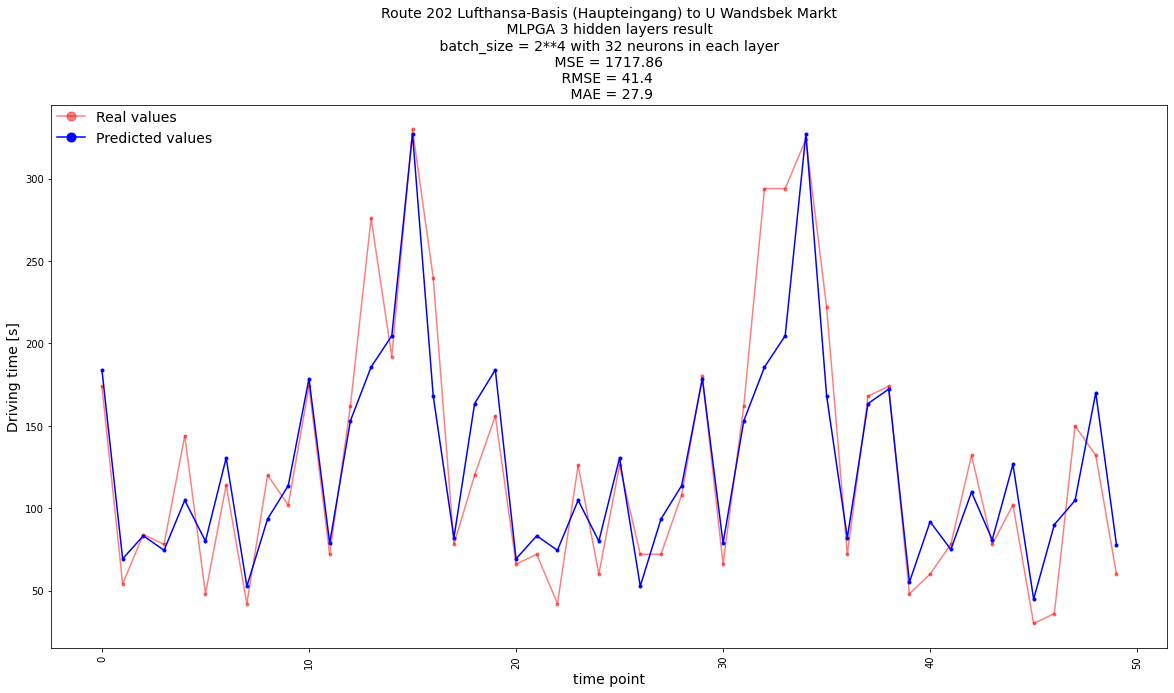

time: 449 ms (started: 2021-01-15 17:36:13 +00:00)


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(inv_y_true[:50], '.-', color='red', label='Real values', alpha=0.5)
plt.plot(inv_y_pred[:50], '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('time point', fontsize=14) 

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result, rmse_result, mae_result = model.evaluate(X_test, y_test)

plt.title(path_name+'\n MLPGA %.0f hidden layers result \n batch_size = 2**%.0f with %.0f neurons in each layer \n MSE = %.2f \n RMSE = %.1f  \n MAE = %.1f' 
          % (best_model['n_layers'], best_model['bs_double'], 
             best_model['n_neurons'], 
             mse, rmse, mae), fontsize = 14)

print('FINISHED')

46/46 [==============================] - 0s 917us/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - mae: 0.0461
FINISHED


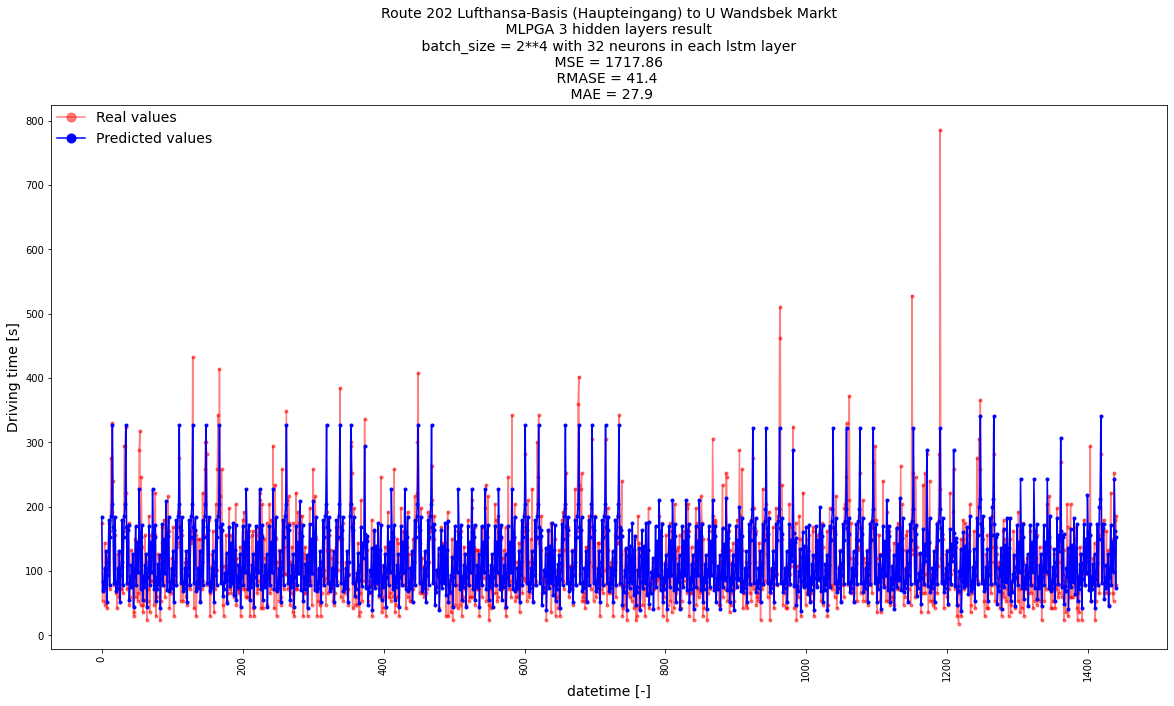

time: 559 ms (started: 2021-01-15 17:36:14 +00:00)


In [ ]:
plt.figure(figsize=(20,10))
plt.plot( inv_y_true, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( inv_y_pred, '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result, rmse_result, mae_result = model.evaluate(X_test, y_test)

plt.title(path_name+'\n MLPGA %.0f hidden layers result \n batch_size = 2**%.0f with %.0f neurons in each lstm layer \n MSE = %.2f \n RMASE = %.1f  \n MAE = %.1f' 
          % (best_model['n_layers'], best_model['bs_double'], 
             best_model['n_neurons'],  mse, rmse, mae), fontsize = 14)

print('FINISHED')

# Combine results

In [ ]:
comb_result= comb_result.drop(['Unnamed: 0'], axis=1) #, 'Unnamed: 0.1', 'Unnamed: 0.1.1'

time: 3.88 ms (started: 2021-01-15 17:36:34 +00:00)


In [ ]:
#comb_result=comb_result[datetime_difference:].reset_index()
#comb_result.rename(columns={'Unnamed: 0.1': 'index'})
comb_result = comb_result.rename(columns= {'Unnamed: 0.1':'index'})
comb_result

In [ ]:
len(inv_y_pred[len(comb_result['Path'].unique())*2:])
#len(inv_y_pred[:])
#len(comb_result['Path'].unique())

1403

time: 4.02 ms (started: 2021-01-15 17:39:01 +00:00)


In [ ]:
#inv_y_pred[int(np.floor(size_trip*best_model['n_timewindow'])):]

time: 841 µs (started: 2021-01-15 17:36:46 +00:00)


In [ ]:
comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name] = inv_y_pred[len(comb_result['Path'].unique())*2:]
#comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name] = inv_y_pred[11:]
#comb_result = comb_result[20:].reset_index(drop = True)
comb_result

,Date time,Path,Actual,Actual_trip_cum,MLP,MLP_trip_cum,MLP_Kalman,MLP_Kalman_trip_cum,LSTM_3H_64,LSTM_3H_64_trip_cum,LSTMGA_2H_32,LSTMGA_2H_32_trip_cum,MLPGA_3H_16
0,2019-04-23 07:10:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,174.0,174,124.276067,124,124.276067,124.276067,178.261693,178,189.055195,189,172.272097
1,2019-04-23 07:12:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),48.0,222,123.942955,248,148.804922,273.080989,59.364828,237,61.691786,250,55.095052
2,2019-04-23 07:13:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,60.0,282,124.786484,373,107.759488,380.840477,87.526425,325,88.097661,338,91.779013
3,2019-04-23 07:15:00,Moltrechtweg|Brabandstraße,78.0,360,123.004773,496,98.294653,479.135130,70.076247,395,66.803394,405,74.915019
4,2019-04-23 07:16:00,Brabandstraße|Hindenburgstraße,132.0,492,123.666688,619,99.839662,578.974793,99.249550,494,106.504281,512,109.731180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2019-04-25 07:41:00,U Habichtstraße|Habichtstraße (Mitte),54.0,1614,125.380412,1876,118.402453,1783.071842,94.599245,1458,94.112504,1389,97.871538
1399,2019-04-25 07:43:00,Habichtstraße (Mitte)|U Alter Teichweg,252.0,1866,125.380394,2002,114.813404,1897.885246,227.284139,1686,232.691094,1622,243.765668
1400,2019-04-25 07:46:00,U Alter Teichweg|U Straßburger Straße,180.0,2046,124.038584,2126,122.162981,2020.048227,169.362381,1855,166.900649,1789,162.962386
1401,2019-04-25 07:48:00,U Straßburger Straße|Wandsbeker Allee,78.0,2124,125.380412,2251,126.822178,2146.870405,71.874325,1927,64.902828,1854,73.035954


time: 43.1 ms (started: 2021-01-15 17:39:15 +00:00)


In [ ]:
if route == 202:
  route_unique = np.array(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'], dtype= object)
else:
  route_unique = (comb_result.Path.unique())
route_unique

array(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
       'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
       'Alsterkrugchaussee (Mitte)|Moltrechtweg',
       'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
       'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
       'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
       'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek',
       'AK Barmbek|Hartzloh', 'Hartzloh|Habichtsplatz',
       'Habichtsplatz|U Habichtstraße',
       'U Habichtstraße|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Alter Teichweg',
       'U Alter Teichweg|U Straßburger Straße',
       'U Straßburger Straße|Wandsbeker Allee',
       'Wandsbeker Allee|U Wandsbek Markt'], dtype=object)

time: 7.44 ms (started: 2021-01-15 17:41:19 +00:00)


In [ ]:
comb_result['Path']

0       Lufthansa-Basis (Haupteingang)|Obenhauptstraße
1           Obenhauptstraße|Alsterkrugchaussee (Mitte)
2              Alsterkrugchaussee (Mitte)|Moltrechtweg
3                           Moltrechtweg|Brabandstraße
4                       Brabandstraße|Hindenburgstraße
                             ...                      
1398             U Habichtstraße|Habichtstraße (Mitte)
1399            Habichtstraße (Mitte)|U Alter Teichweg
1400             U Alter Teichweg|U Straßburger Straße
1401             U Straßburger Straße|Wandsbeker Allee
1402                 Wandsbeker Allee|U Wandsbek Markt
Name: Path, Length: 1403, dtype: object

time: 4.91 ms (started: 2021-01-15 17:41:24 +00:00)


In [ ]:
#add a new column for trip accumulate
comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'] = 0
a = 0
for i in range(len(comb_result)):
  if comb_result['Path'][i] == route_unique[0]: #the first path
    a = comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name][i]
    comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'][i] = a
  else:
    a += comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name][i] 
    comb_result['MLPGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'][i] = a
comb_result[:50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Date time,Path,Actual,Actual_trip_cum,MLP,MLP_trip_cum,MLP_Kalman,MLP_Kalman_trip_cum,LSTM_3H_64,LSTM_3H_64_trip_cum,LSTMGA_2H_32,LSTMGA_2H_32_trip_cum,MLPGA_3H_16,MLPGA_3H_16_trip_cum
0,2019-04-23 07:10:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,174.0,174,124.276067,124,124.276067,124.276067,178.261693,178,189.055195,189,172.272097,172
1,2019-04-23 07:12:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),48.0,222,123.942955,248,148.804922,273.080989,59.364828,237,61.691786,250,55.095052,227
2,2019-04-23 07:13:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,60.0,282,124.786484,373,107.759488,380.840477,87.526425,325,88.097661,338,91.779013,319
3,2019-04-23 07:15:00,Moltrechtweg|Brabandstraße,78.0,360,123.004773,496,98.294653,479.135130,70.076247,395,66.803394,405,74.915019,394
4,2019-04-23 07:16:00,Brabandstraße|Hindenburgstraße,132.0,492,123.666688,619,99.839662,578.974793,99.249550,494,106.504281,512,109.731180,503
5,2019-04-23 07:18:00,Hindenburgstraße|U Alsterdorf,78.0,570,123.158095,742,108.662296,687.637089,77.428864,571,73.940580,586,80.772079,584
6,2019-04-23 07:19:00,U Alsterdorf|Sydneystraße,102.0,672,122.702851,865,105.897553,793.534642,120.259061,692,130.223636,716,126.591069,711
7,2019-04-23 07:21:00,Sydneystraße|Manilabrücke,30.0,702,124.994357,990,109.802527,903.337169,47.981692,740,46.763797,763,44.802138,755
8,2019-04-23 07:22:00,Manilabrücke|Kapstadtring,36.0,738,125.038731,1115,102.667935,1006.005104,89.594617,829,92.074744,855,90.022274,845
9,2019-04-23 07:23:00,Kapstadtring|S Rübenkamp,150.0,888,124.414995,1239,97.614485,1103.619588,101.137898,930,100.550616,955,104.710939,950


time: 181 ms (started: 2021-01-15 17:41:52 +00:00)


# Export data

In [ ]:
#path_file = 'combine_result'+path_end+'.csv'
#comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/Mon_1_5_combine_result_"+path_end+".csv")
#comb_result_rmse.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/Mon_1_5_combine_result_rmse_"+path_end+".csv")
#!cp path_file "/content/drive/My Drive/Colab Notebooks/Thesis"

comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
#comb_result_rmse.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")

time: 746 ms (started: 2021-01-15 17:42:32 +00:00)
